# McDonalds Market Segmentation


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.visuz import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

### Data Exploration

In [4]:
#importing and exploring the data
df=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [ ]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
print(df.shape)

(1453, 15)


In [6]:
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [7]:
#taking first 11 columns
segmentation_columns = df.columns[:11]
MD_x = df[segmentation_columns]

MD_x = (MD_x == "Yes").astype(int)

average_values = MD_x.mean()

print(round(average_values, 2))

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [9]:
MD_x = df.iloc[:, 0:11].apply(lambda col: col.map(lambda x: 1 if x == "Yes" else 0))
col_means=np.mean(MD_x, axis=0)
round_means=np.round(col_means,2)
print(round_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


### Performing PCA

In [11]:
from sklearn import preprocessing
MD_pca = preprocessing.scale(MD_x)

pca = PCA(n_components=11)
pc = pca.fit_transform(MD_x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data=MD_pca, columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])])
pf

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-1.111479,0.318735,-0.321349,0.391375,-1.054476,0.332951,0.818605,-1.345528,1.339489,-0.498279,-0.566488
1,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,1.339489,-0.498279,-0.566488
2,-1.111479,0.318735,3.111884,0.391375,0.948339,0.332951,-1.221590,0.743203,1.339489,2.006908,-0.566488
3,0.899702,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,0.743203,-0.746553,-0.498279,1.765261
4,-1.111479,0.318735,-0.321349,0.391375,0.948339,0.332951,0.818605,-1.345528,-0.746553,2.006908,-0.566488
...,...,...,...,...,...,...,...,...,...,...,...
1448,-1.111479,0.318735,-0.321349,0.391375,0.948339,-3.003446,-1.221590,-1.345528,1.339489,-0.498279,1.765261
1449,0.899702,0.318735,-0.321349,0.391375,-1.054476,-3.003446,0.818605,0.743203,-0.746553,2.006908,-0.566488
1450,0.899702,0.318735,-0.321349,0.391375,-1.054476,0.332951,-1.221590,0.743203,1.339489,-0.498279,-0.566488
1451,0.899702,0.318735,-0.321349,-2.555092,-1.054476,0.332951,0.818605,0.743203,-0.746553,2.006908,-0.566488


In [12]:
# determining the principle components
pca=PCA()
MD_pca=pca.fit_transform(MD_x)

MD_pca_df = pd.DataFrame(data=MD_pca, columns=[f'PC{i+1}' for i in range(MD_pca.shape[1])])

print("\nImportance of Components:")
print(MD_pca_df)


Importance of Components:
           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     0.425367 -0.219079  0.663255 -0.401300  0.201705 -0.389767 -0.211982   
1    -0.218638  0.388190 -0.730827 -0.094724  0.044669 -0.086596 -0.095877   
2     0.375415  0.730435 -0.122040  0.692262  0.839643 -0.687406  0.583112   
3    -0.172926 -0.352752 -0.843795  0.206998 -0.681415 -0.036133 -0.054284   
4     0.187057 -0.807610  0.028537  0.548332  0.854074 -0.097305 -0.457043   
...        ...       ...       ...       ...       ...       ...       ...   
1448  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   
1449 -0.957339  0.014308  0.303843  0.444350 -0.133690  0.381804 -0.326432   
1450 -0.185894  1.062662  0.220857 -0.467643 -0.187757 -0.192703 -0.091597   
1451 -1.182064 -0.038570  0.561561  0.701126  0.047645  0.193687 -0.027335   
1452  1.550242  0.275031 -0.013737  0.200604 -0.145063  0.306575 -0.075308   

           PC8       PC9      PC10  

In [15]:
loadings = pca.components_
num_pc = pca.n_features_in_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = MD_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


In [16]:
rotations = pca.components_.T

rotations_df = pd.DataFrame(rotations, columns=[f'PC{i+1}' for i in range(rotations.shape[1])], index=df.columns[:11])

rotations_df = rotations_df.round(1)

std_devs = np.sqrt(pca.explained_variance_).round(1)

print("Standard deviations (1, .., p=11):")
print(std_devs)
print("Rotation matrix (11 x 11):")
print(rotations_df)

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]
Rotation matrix (11 x 11):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy      -0.5  0.4 -0.3  0.1 -0.3  0.2 -0.3  0.0  0.6  -0.1   0.0
convenient -0.2  0.0 -0.1 -0.1  0.3 -0.3 -0.1 -0.1 -0.0  -0.7  -0.5
spicy      -0.0  0.0 -0.0  0.2  0.1 -0.4  0.7  0.4  0.4  -0.1   0.1
fattening   0.1 -0.0 -0.3 -0.4 -0.1 -0.4 -0.4  0.6 -0.2  -0.0   0.3
greasy      0.3 -0.1 -0.8  0.3  0.4  0.2  0.0 -0.1 -0.0   0.0   0.0
fast       -0.1 -0.1 -0.1 -0.1  0.1 -0.6 -0.1 -0.6  0.2   0.2   0.3
cheap      -0.3 -0.6 -0.1  0.1 -0.1 -0.1 -0.0  0.1  0.1   0.4  -0.5
tasty      -0.5  0.3 -0.3 -0.0 -0.2 -0.1  0.4 -0.1 -0.6   0.1   0.0
expensive   0.3  0.6  0.0  0.1 -0.0 -0.3 -0.1  0.0  0.1   0.5  -0.5
healthy    -0.2  0.1  0.2  0.8  0.3 -0.2 -0.3  0.2 -0.2  -0.0   0.2
disgusting  0.4 -0.1 -0.1  0.4 -0.7 -0.2 -0.0 -0.2 -0.1  -0.3  -0.0


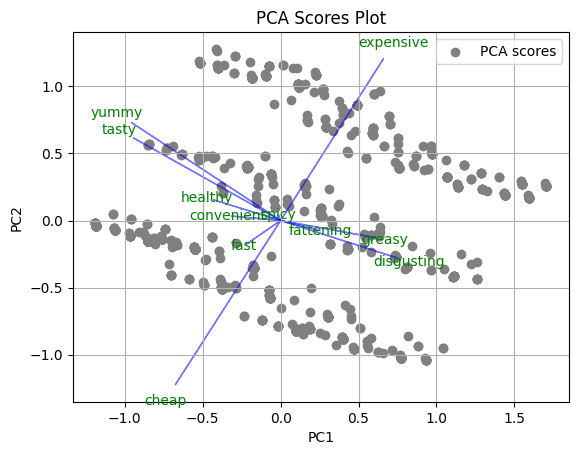

In [18]:
# plotting the pcs scores showing clusters
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c='grey', label='PCA scores')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Scores Plot')

def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='b', alpha=0.5)
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='g', ha='center', va='center')

feature_names = df.columns[:11]
plot_proj_axes(rotations[:, :2], feature_names)

plt.legend()
plt.grid()
plt.show()

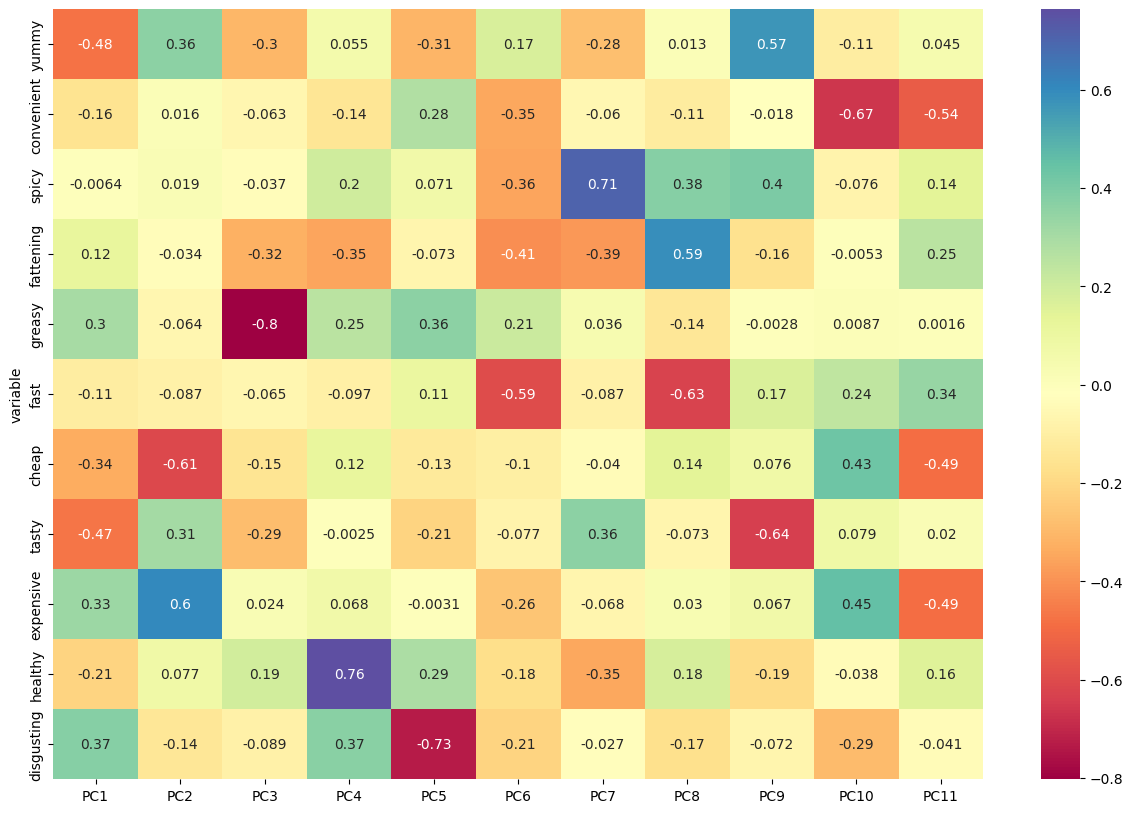

In [19]:
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

### Extracting Segments

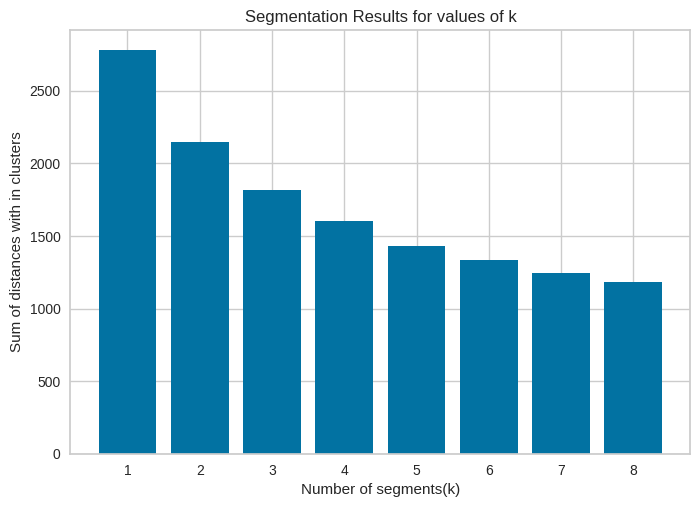

In [23]:
# using kmeans and determinig clusters
np.random.seed(1234)

nrep = 10

num_segments = range(1, 9)
within_cluster_distances = []
MD_km28 = {}
for k in num_segments:
    kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
    kmeans.fit(MD_x)
    within_cluster_distances.append((kmeans.inertia_))
    MD_km28[str(k)] = kmeans

plt.bar(num_segments, within_cluster_distances,)
plt.xlabel("Number of segments(k)")
plt.ylabel("Sum of distances with in clusters")
plt.title("Segmentation Results for values of k")
plt.show()

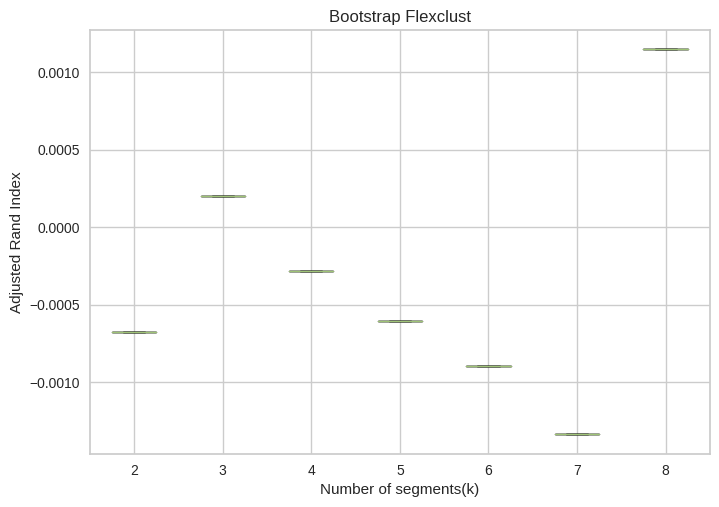

In [21]:
# resampling kmeans with bootstrap
np.random.seed(1234)
nboot = 100
nrep = 10

bootstrap_samples = []
for _ in range(nboot):
    bootstrap_sample = resample(MD_x.values, random_state=1234)
    bootstrap_samples.append(bootstrap_sample)

adjusted_rand_index = []
num_segments = range(2, 9)
for k in num_segments:
    stability_scores = []
    for bootstrap_sample in bootstrap_samples:
        kmeans = KMeans(n_clusters=k, n_init=nrep, random_state=1234)
        kmeans.fit(bootstrap_sample)
        cluster_labels = kmeans.predict(bootstrap_sample)
        true_labels = kmeans.predict(MD_x.values)
        stability_score = adjusted_rand_score(true_labels, cluster_labels)
        stability_scores.append(stability_score)
    adjusted_rand_index.append(stability_scores)

# Transpose the adjusted_rand_index list
adjusted_rand_index = np.array(adjusted_rand_index).T

# boxplot
plt.boxplot(adjusted_rand_index, whis=10)
plt.xlabel("Number of segments(k)")
plt.ylabel("Adjusted Rand Index")
plt.title("Bootstrap Flexclust")

# Set custom tick labels
plt.xticks(ticks=range(1, len(num_segments) + 1), labels=num_segments)

plt.show()

### Segment Similarity and Stability

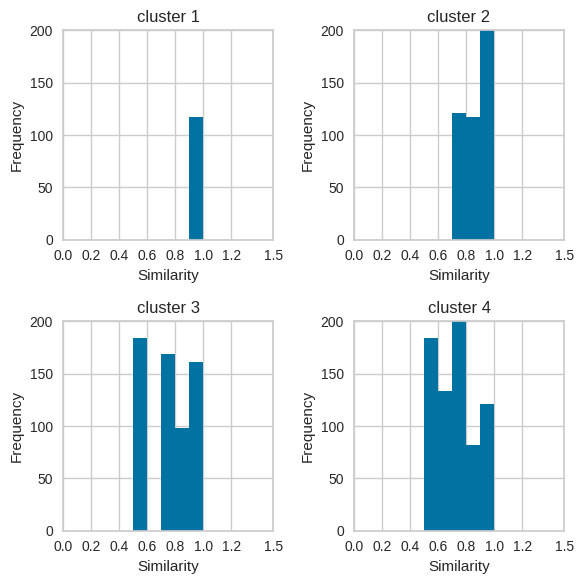

In [24]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(6, 6))


for i in range(1, 5):
    labels = MD_km28[str(i)].predict(MD_x)
    similarities = MD_km28[str(i)].transform(MD_x).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(0, 1.5)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.5])

plt.tight_layout()
plt.show()

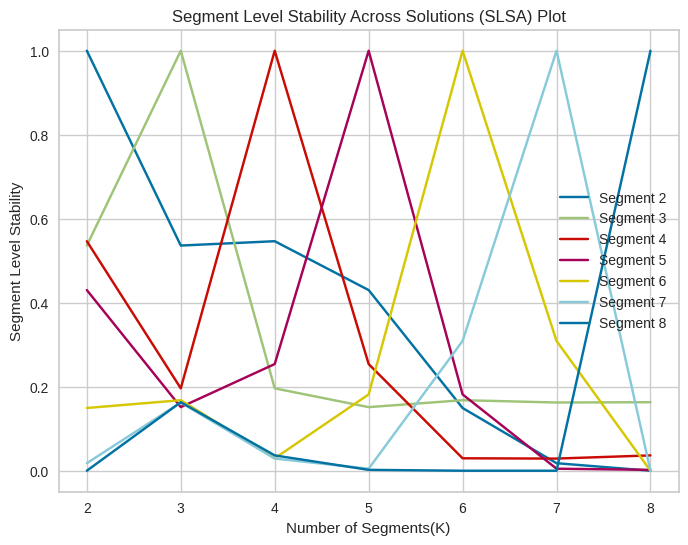

In [25]:
# SLSA plot
num_segments = range(2, 9)

segment_stability = []
for segment in range(2, 9):
    labels_segment = MD_km28[str(segment)].predict(MD_x)
    segment_stability.append(labels_segment)

plt.figure(figsize=(8, 6))
for i, segment in enumerate(range(2, 9)):
    plt.plot(num_segments, [np.mean(segment_stability[i] == labels) for labels in segment_stability], label=f'Segment {segment}')

plt.xlabel('Number of Segments(K)')
plt.ylabel('Segment Level Stability')
plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
plt.xticks(num_segments)
plt.legend()
plt.show()

In [26]:
segment_solutions = ["2", "3", "4", "5"]
segment_labels = {}
segment_similarities = {}

for segment in segment_solutions:
    segment_labels[segment] = MD_km28[segment].predict(MD_x)
    segment_similarities[segment] = MD_km28[segment].transform(MD_x).min(axis=1)

segment_labels

{'2': array([1, 0, 0, ..., 0, 0, 1], dtype=int32),
 '3': array([1, 0, 0, ..., 0, 2, 1], dtype=int32),
 '4': array([1, 3, 3, ..., 3, 0, 2], dtype=int32),
 '5': array([2, 3, 4, ..., 4, 0, 1], dtype=int32)}

In [ ]:
segment_similarities

{'2': array([1.18700649, 1.03060963, 1.83763118, ..., 1.12682984, 1.27986291,
        1.28015113]),
 '3': array([1.18819649, 1.05436747, 1.50713439, ..., 0.7453038 , 1.14333643,
        1.31518757]),
 '4': array([1.24128843, 1.12309822, 1.60643292, ..., 0.64651073, 1.09194857,
        0.92824488]),
 '5': array([1.23242931, 0.96719367, 1.57883931, ..., 0.61881309, 0.97175595,
        0.92328464])}

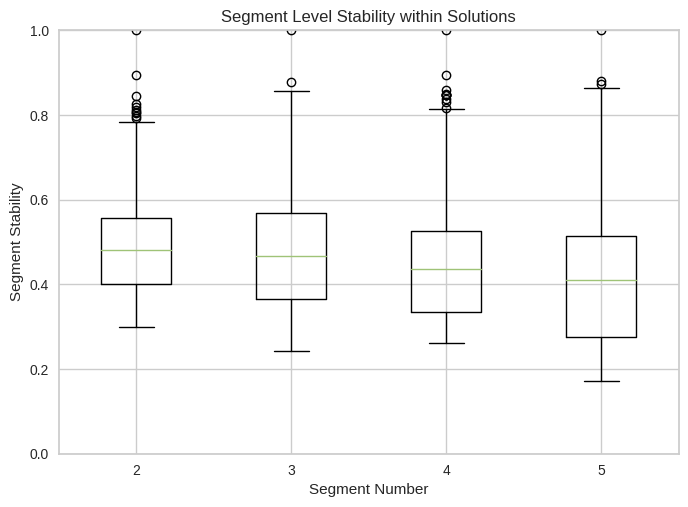

In [27]:
# SLSW using boxplot
segment_stability_values = []
for segment in segment_solutions:
    similarities = segment_similarities[segment]
    normalized_similarities = similarities / np.max(similarities)
    segment_stability_values.append(normalized_similarities)

plt.boxplot(segment_stability_values, whis=1.5)
plt.xlabel("Segment Number")
plt.ylabel("Segment Stability")
plt.xticks(range(1, len(segment_solutions) + 1), segment_solutions)
plt.ylim(0, 1)
plt.title("Segment Level Stability within Solutions")

plt.show()

### Mixture Models and Summary

In [30]:
# mixing models
from scipy.stats import entropy
import warnings

np.random.seed(1234)
k_values = range(2, 9)
MD_m28 = []
warnings.filterwarnings("ignore", category=FutureWarning)

for k in k_values:
    model = KMeans(n_clusters=k, random_state=1234)
    model.fit(MD_x.values)
    iter_val = model.n_iter_
    converged = True
    k_val = k
    k0_val = k
    log_likelihood = -model.inertia_
    n_samples, _ = MD_x.shape
    aic = -2 * log_likelihood + 2 * k
    bic = -2 * log_likelihood + np.log(n_samples) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy

    MD_m28.append((iter_val, converged, k_val, k0_val, log_likelihood, aic, bic, icl))
MD_m28 = pd.DataFrame(MD_m28, columns=['iter', 'converged', 'k', 'k0', 'logLik', 'AIC', 'BIC', 'ICL'])

print(MD_m28)

   iter  converged  k  k0       logLik          AIC          BIC          ICL
0     6       True  2   2 -2145.503727  4295.007454  4305.570225  4304.904547
1     6       True  3   3 -1818.717659  3643.435318  3659.279475  3658.209672
2     9       True  4   4 -1604.107292  3216.214583  3237.340126  3235.989403
3    11       True  5   5 -1434.610417  2879.220835  2905.627763  2904.035975
4     8       True  6   6 -1331.652440  2675.304880  2706.993194  2705.228430
5     6       True  7   7 -1248.417887  2510.835774  2547.805474  2545.884829
6     9       True  8   8 -1182.100019  2380.200037  2422.451123  2420.433939


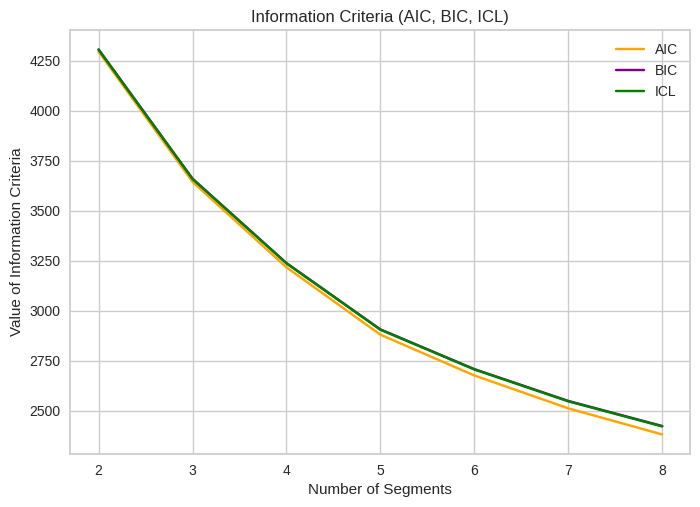

In [32]:
num_segments = MD_m28["k"]
AIC_values = MD_m28["AIC"]
BIC_values = MD_m28["BIC"]
ICL_values = MD_m28["ICL"]

plt.plot(num_segments, AIC_values, marker='x', label='AIC', color='orange')
plt.plot(num_segments, BIC_values, marker='x', label='BIC', color='purple')
plt.plot(num_segments, ICL_values, marker='x', label='ICL', color='green')

plt.xlabel('Number of Segments')
plt.ylabel('Value of Information Criteria')
plt.title('Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.mixture import GaussianMixture
k = 4
kmeans = KMeans(n_clusters=k, random_state=1234)
kmeans.fit(MD_x)
kmeans_clusters = kmeans.predict(MD_x)

gmm = GaussianMixture(n_components=k, random_state=1234)
gmm.fit(MD_x)
gmm_clusters = gmm.predict(MD_x)

results = pd.DataFrame({'kmeans': kmeans_clusters, 'mixture': gmm_clusters})

MD_m4 = MD_x[results['mixture'] == 3]

k4_m4 = KMeans(n_clusters=k, random_state=1234)
k4_m4.fit(MD_m4)
k4_m4_clusters = k4_m4.predict(MD_m4)

results_m4 = pd.DataFrame({'kmeans': k4_m4_clusters, 'mixture': 3})

print(pd.crosstab(results['kmeans'], results['mixture']))
print(pd.crosstab(results['kmeans'], results_m4['kmeans']))

mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [34]:
from sklearn.mixture import GaussianMixture
import numpy as np

gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD_x)

log_likelihood_m4a = gmm_m4a.score(MD_x)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD_x)

log_likelihood_m4 = gmm_m4.score(MD_x)

print("Log-likelihood for MD.m4a:", log_likelihood_m4a)
print("Log-likelihood for MD.m4:", log_likelihood_m4)

Log-likelihood for MD.m4a: 11.727872558164462
Log-likelihood for MD.m4: 11.151316714845965


In [35]:
reversed_table = df['Like'].value_counts().sort_index(ascending=False)

print("Reversed table:")
print(reversed_table)

Reversed table:
Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [36]:
like_mapping = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

df['Like.n'] = df['Like'].map(like_mapping)
df['Like.n'] = 6 - df['Like.n']

like_n_counts = df['Like.n'].value_counts().sort_index()

print(like_n_counts)

Like.n
1     143
2     160
3     229
4     187
5     152
6     169
7      58
8      59
9      73
10     71
11    152
Name: count, dtype: int64


In [37]:
from patsy import dmatrices

independent_vars = df.columns[0:11]

formula_str = ' + '.join(independent_vars)

formula_str = 'Like ~ ' + formula_str


f = dmatrices(formula_str, data=df)[1]

print(f)

[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [38]:
from sklearn.mixture import GaussianMixture
from patsy import dmatrix
np.random.seed(1234)

X = dmatrix(f.design_info, data=df)
y = dmatrix('Like', data=df)

n_components = 2
n_init = 10
n_rep=10

model = GaussianMixture(n_components=n_components, n_init=n_init, verbose = False)
MD_reg2 = model.fit(X, y)

print(MD_reg2)
cluster_sizes = np.bincount(model.predict(X))

print("Cluster sizes:")
for i, size in enumerate(cluster_sizes):
    print(f"{i+1}: {size}")

GaussianMixture(n_components=2, n_init=10, verbose=False)
Cluster sizes:
1: 468
2: 985


### Profiling Segments

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [65.0, 65.0, 82.5, 82.5],
  [55.0, 55.0, 73.75, 73.75],
  [21.25, 21.25, 64.375, 64.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 0.0],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717]],
 'ivl': ['0', '7', '6', '3', '(2)', '4', '8', '10', '2', '9'],
 'leaves': [0, 7, 6, 3, 11, 4, 8, 10, 

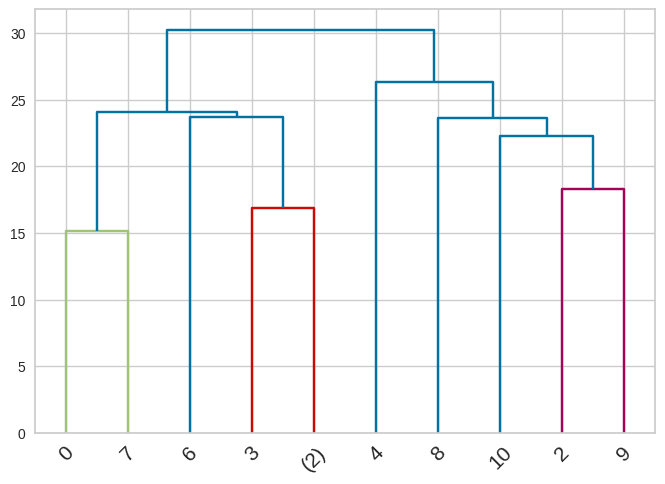

In [41]:
# heirarchial clustering
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

D = np.transpose(MD_x)
D = linkage(D, method = "average")
dendrogram(D, truncate_mode="lastp", p=10, leaf_rotation=45,
           leaf_font_size=15, show_contracted=True)

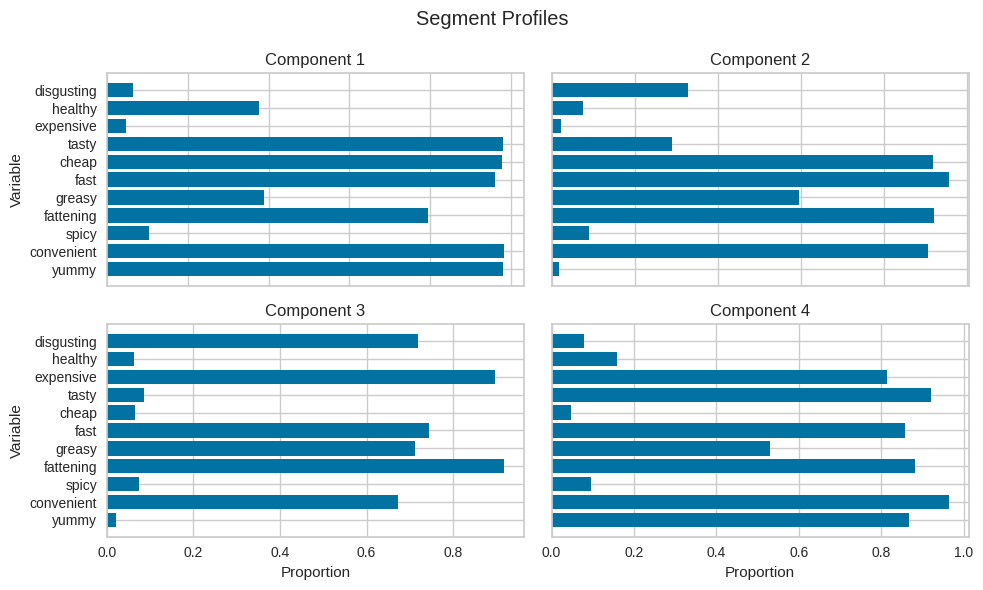

In [42]:
# 4-component solution
import pandas as pd
import matplotlib.pyplot as plt

kmeans = MD_km28['4']

labels = kmeans.labels_

MD_mean = MD_x.groupby(labels).mean()

fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(MD_mean.shape[1]), MD_mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(MD_mean.shape[1]), MD_mean.iloc[3])
axs[1, 1].set_title('Component 4')

for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(MD_mean.shape[1]))
    ax.set_yticklabels(MD_x.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()

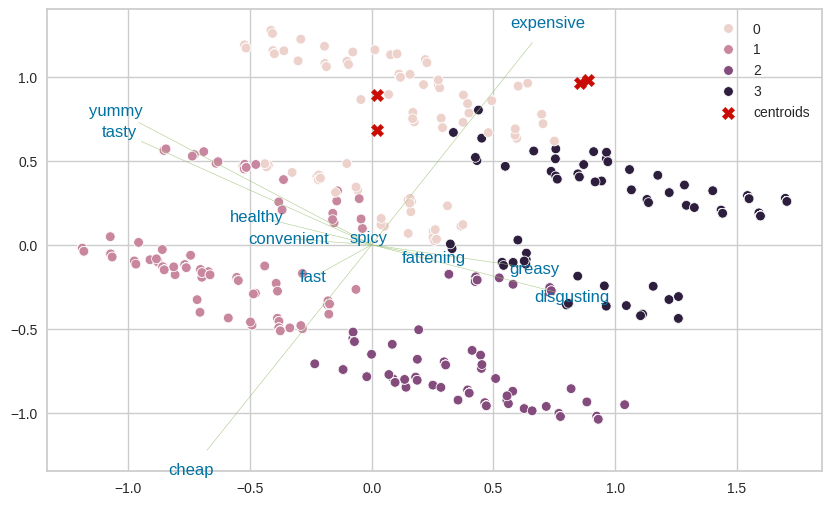

In [58]:
# showing the cluster solution
sns.scatterplot(data=df,x=MD_pca[:, 0], y=MD_pca[:, 1], hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker="X", c="r", s=80, label="centroids")

def plot_proj_axes(rotations, labels):
    for i, label in enumerate(labels):
        plt.arrow(0, 0, rotations[i, 0]*2, rotations[i, 1]*2, color='g', alpha=0.5)
        plt.text(rotations[i, 0]*2.2, rotations[i, 1]*2.2, label, color='b', ha='center', va='center')

feature_names = df.columns[:11]
plot_proj_axes(rotations[:, :2], feature_names)

plt.legend()
plt.grid(True)
plt.show()

### Describing Segments

In [44]:
# segment description
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn.preprocessing import LabelEncoder

df1=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

def labelling(x):
    df1[x] = LabelEncoder().fit_transform(df1[x])
    return df1

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df_eleven = df1.loc[:,cat]
df_eleven
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_eleven)
df1['cluster_num'] = kmeans.labels_
crosstab =pd.crosstab(df1['cluster_num'],df1['Like'])
df1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female,2
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female,0
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female,0
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female,1
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,I hate it!-5,47,Once a year,Male,3
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female,1
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female,0
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male,1


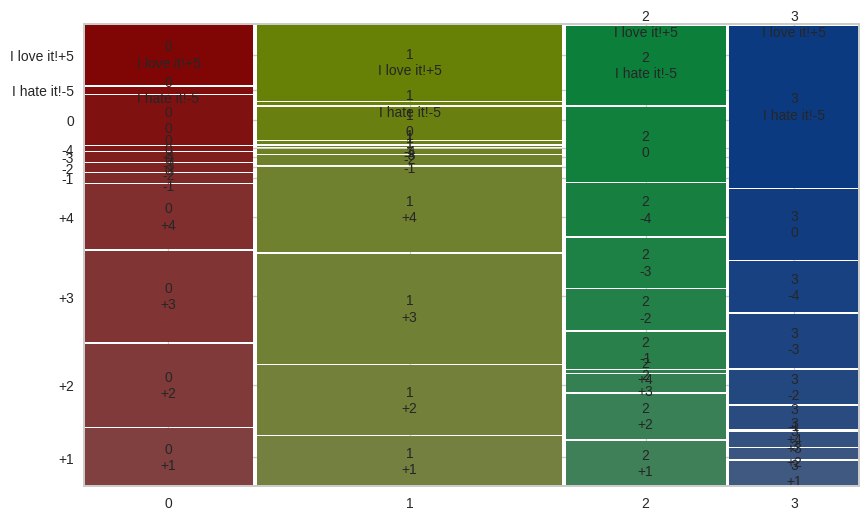

In [45]:
plt.rcParams['figure.figsize'] = (10,6)
mosaic(crosstab.stack())
plt.show()

In [46]:
from statsmodels.graphics.mosaicplot import mosaic

MD_k4=MD_km28['4']
k4 = MD_k4.labels_

ct = pd.crosstab(k4, df['Gender'])
ct

Gender,Female,Male
row_0,,
0,309,204
1,213,153
2,101,141
3,165,167


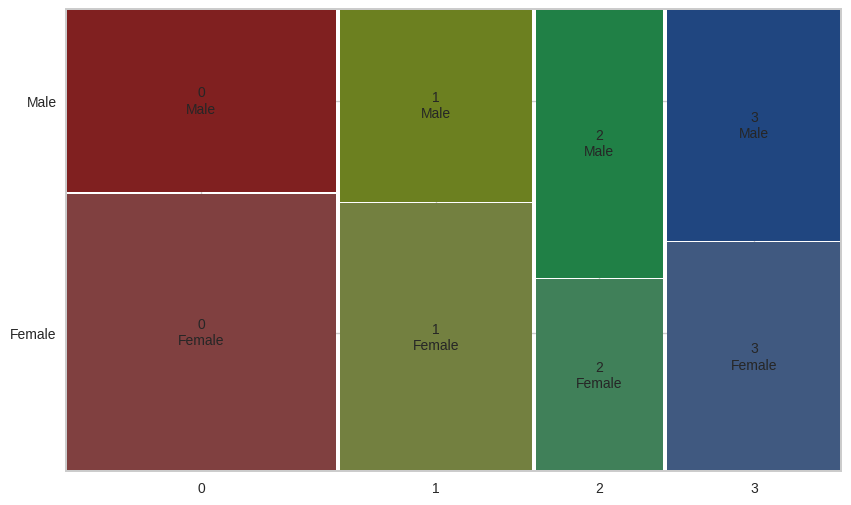

In [47]:
mosaic(ct.stack(),gap=0.005)
plt.show()

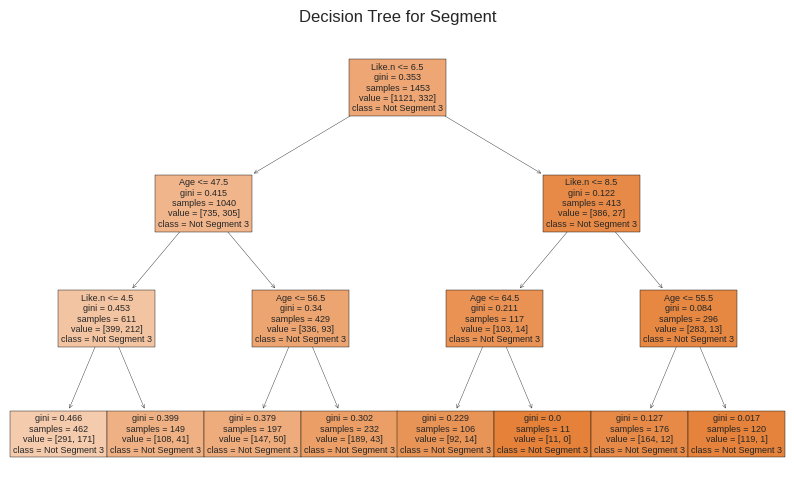

In [61]:
# membership plot
from sklearn.tree import DecisionTreeClassifier, plot_tree


X = df[['Like.n', 'Age']]
y = (k4==3).astype(int)

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X, y)

plt.figure(figsize=(10, 6))
plot_tree(tree, feature_names=X.columns, class_names=['Not Segment 3', 'Segment 3'], filled=True)
plt.title("Decision Tree for Segment")
plt.show()

### Selecting Target Segment

In [49]:
df1['VisitFrequency'] = LabelEncoder().fit_transform(df1['VisitFrequency'])
visit = df1.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [50]:
df1['Like'] = LabelEncoder().fit_transform(df1['Like'])
Like = df1.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [51]:
df1['Gender'] = LabelEncoder().fit_transform(df1['Gender'])
Gender = df1.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [52]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.798762,2.547988
1,1,0.398276,3.794828,2.584483
2,2,0.411184,5.430921,2.822368
3,3,0.569106,6.739837,2.654472


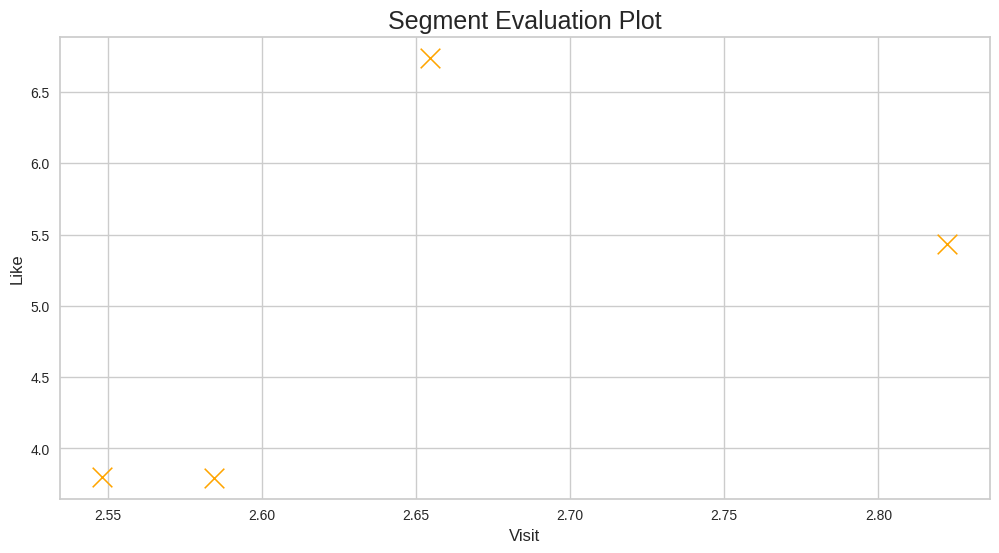

In [57]:
# segment evalutaion
plt.figure(figsize=(12, 6))
sns.scatterplot(x="VisitFrequency", y="Like", data=segment, s=200, marker='x', color='orange')
plt.title("Segment Evaluation Plot", fontsize=18)
plt.xlabel("Visit", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.grid(True)
plt.show()